In [1]:
import plotly.express as px
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import panel as pn
from panel.interact import interact
import hvplot.pandas as hvplot

from dotenv import load_dotenv
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Jordan\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
load_dotenv()
mapbox_api = os.getenv("mapbox_key")

In [3]:
#Building Main Data Frame with Opportunity Ratio and saving as zall_df.csv to ../data/clean_data
prop_value_df = pd.read_csv(Path("../data/clean_data/ZCON.csv"), header = 0, usecols = ["YEAR","AVG_PROP","ZIPCODE","CITY"], names = ["YEAR","REGION","AVG_PROP","ZIPCODE","CITY"], infer_datetime_format=True, parse_dates=True)[["YEAR","ZIPCODE","CITY","AVG_PROP"]]
prop_value_df["YEAR"] = pd.DatetimeIndex(prop_value_df["YEAR"]).year
#prop_valuezall_df = prop_value_df.groupby(["YEAR","ZIPCODE"],as_index = True).sum()
#prop_value_df.head
#prop_value_df["AVG_VALUE"].dtypes
avg_income_df = pd.read_csv(Path("../data/clean_data/avg_income.csv"), header = 0, names = ["YEAR","ZIPCODE","AVG_INCOME"], infer_datetime_format=True, parse_dates=True, dtype = {"avg_income" : np.float64})
#avg_income_df = avg_income_df.groupby(["YEAR","ZIPCODE"],as_index = True).mean()
#avg_income_df.head
#avg_income_df["AVG_INCOME"].dtypes
lat_long_df = pd.read_excel(Path("../data/lat_long_by_zip_code.xlsx"), header = 0, usecols = ["Zip Code","Latitude","Longitude"])
lat_long_df = lat_long_df.rename(columns = {"Zip Code": "ZIPCODE", "Latitude": "LATITUDE" ,"Longitude": "LONGITUDE"})
#lat_long_df = lat_long_df.groupby(["ZIPCODE"],as_index = True).mean()
#lat_long_df.head
zall_df = pd.merge(pd.merge(avg_income_df, prop_value_df, how = "inner", on = ["YEAR", "ZIPCODE"]), lat_long_df, how = "inner", on = "ZIPCODE")
#main_df = pd.merge(pd.merge(prop_value_df, avg_income_df, how = "inner", on = "YEAR"), lat_long_df, how = "inner", on = "ZIPCODE")
zall_df["OPPORTUNITY_RATIO"] = zall_df["AVG_INCOME"].astype(float) / zall_df["AVG_PROP"].astype(float)
zall_df = zall_df.groupby(["YEAR", "CITY", "ZIPCODE"], as_index = True).mean()
#zall_df.to_csv("../data/clean_data/zall_df.csv") 
zall_df.head()
#zall_df.dtypes

AVG_INCOME       AVG_PROP  LATITUDE  LONGITUDE  \
YEAR CITY   ZIPCODE                                                      
2007 Austin 78613     68146.254591  236119.916667   30.5052   -97.8203   
            78660     53026.718649  178322.000000   30.4421   -97.6299   
            78664     53795.392731  164835.833333   30.5145   -97.6680   
            78681     75921.291820  160508.166667   30.5083   -97.6789   
            78701    151042.360061  390433.583333   30.2713   -97.7426   

                     OPPORTUNITY_RATIO  
YEAR CITY   ZIPCODE                     
2007 Austin 78613             0.288739  
            78660             0.297515  
            78664             0.326453  
            78681             0.473093  
            78701             0.387204

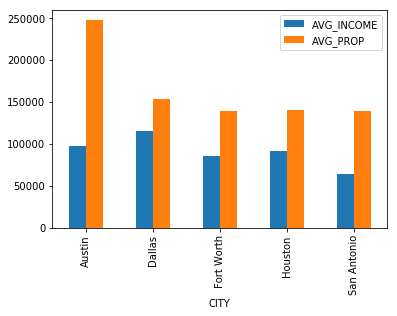

In [4]:
#Building All time AVG_INCOME VS AVG_PROP groupby CITY as all_time_IVP_city_df
all_time_IVP_city_df = zall_df.drop(["LATITUDE","LONGITUDE","OPPORTUNITY_RATIO"], axis=1)
all_time_IVP_city_df = all_time_IVP_city_df.groupby("CITY").mean()
#all_time_IVP_city_df.head
#all_time_IVP_city_df.dtypes

all_time_IVP_city_df.plot.bar()


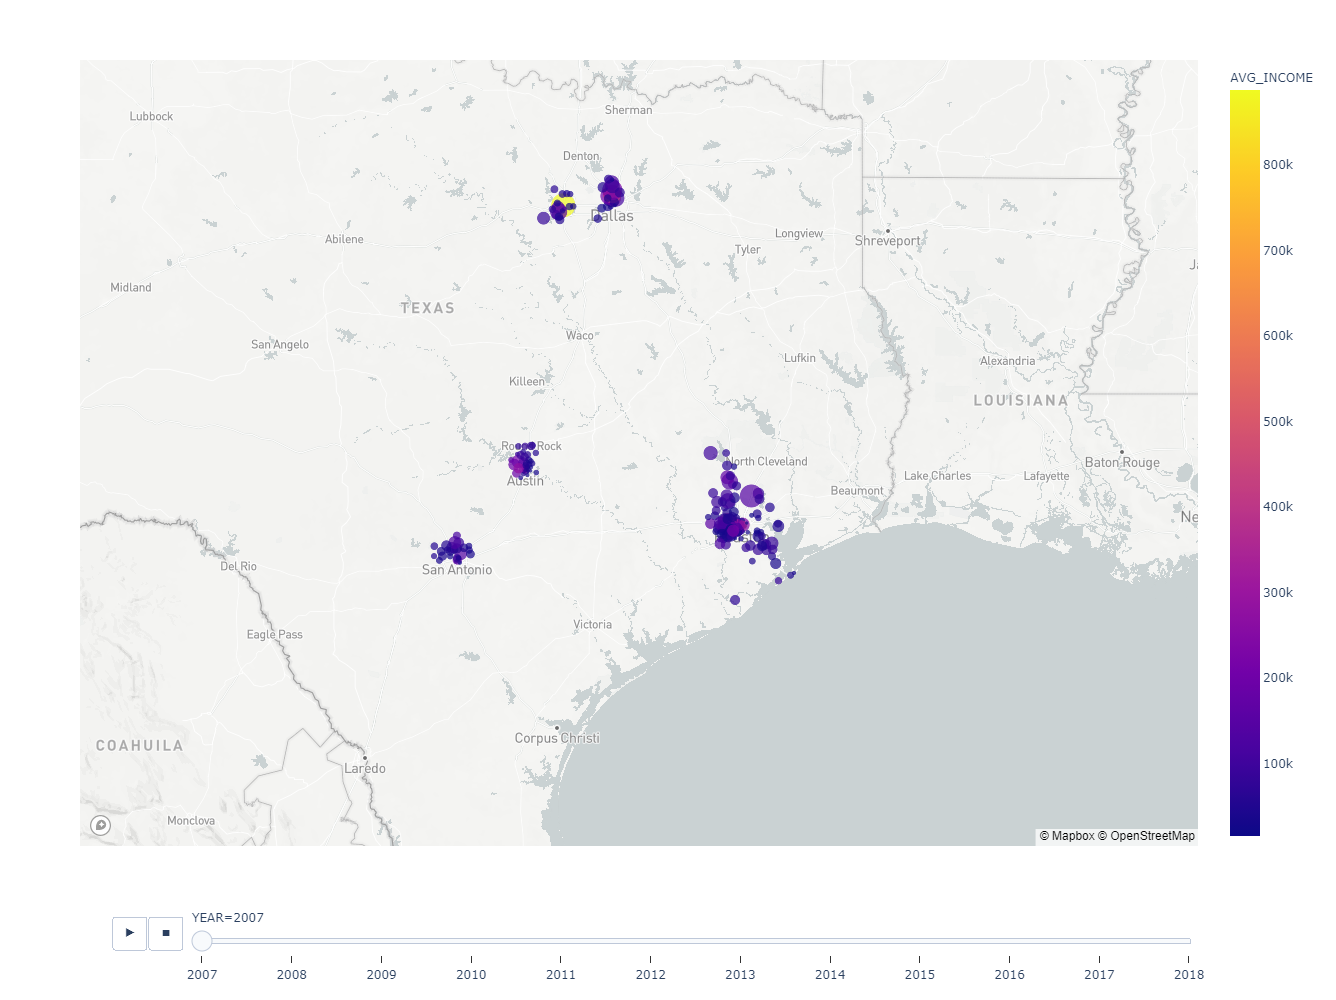

In [10]:
# Read the Mapbox API key
zall_df = zall_df.reset_index()

#zall_df.head()
#zall_df.dtypes

# Set the Mapbox API
px.set_mapbox_access_token(mapbox_api)

map_plot = px.scatter_mapbox(
    zall_df,
    lat="LATITUDE",
    lon="LONGITUDE",
    size="OPPORTUNITY_RATIO",
    color="AVG_INCOME",
    hover_name="ZIPCODE",
    animation_frame="YEAR",
    height = 1000,
    zoom=6
)

map_plot.show()


In [18]:
# Replace AVG INCOME 76102-2017 with the avg btwn 2016 & 2018 to solve outlier issue
# change opportunity ratio after for that income
# zall_df[zall_df["ZIPCODE"]==76102]
corrected_zall = zall_df.set_value(2398,"AVG_INCOME",3.5e5)
zall_df[zall_df["ZIPCODE"]==76102]

C:\Users\Jordan\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



level_0  index  YEAR        CITY  ZIPCODE     AVG_INCOME       AVG_PROP  \
58         58     58  2007  Fort Worth    76102  887369.018654  266655.166667   
263       263    263  2008  Fort Worth    76102  400133.371824  252858.166667   
480       480    480  2009  Fort Worth    76102  240837.770383  241586.500000   
702       702    702  2010  Fort Worth    76102  305043.889619  239544.250000   
928       928    928  2011  Fort Worth    76102  266188.674580  240158.416667   
1161     1161   1161  2012  Fort Worth    76102  524323.376623  249772.083333   
1396     1396   1396  2013  Fort Worth    76102  362074.441687  264493.583333   
1634     1634   1634  2014  Fort Worth    76102  348857.441860  285157.500000   
1880     1880   1880  2015  Fort Worth    76102  341131.147541  314390.083333   
2133     2133   2133  2016  Fort Worth    76102  315468.997669  322928.833333   
2398     2398   2398  2017  Fort Worth    76102  350000.000000  341461.250000   
2669     2669   2669  2018  Fort Worth    76102  398025.541126  360102.750000   

      LATITUDE  LONGITUDE  OPPORTUNITY_RATIO  
58     32.7589    -97.328           3.328662  
263    32.7589    -97.328           1.584304  
480    32.7589    -97.328           0.996997  
702    32.7589    -97.328           1.273612  
928    32.7589    -97.328           1.108842  
1161   32.7589    -97.328           2.100044  
1396   32.7589    -97.328           1.369241  
1634   32.7589    -97.328           1.225235  
1880   32.7589    -97.328           1.085206  
2133   32.7589    -97.328           0.977010  
2398   32.7589    -97.328           4.265982  
2669   32.7589    -97.328           1.105325

In [11]:
#Building All time AVG_INCOME VS AVG_PROP groupby CITY as all_time_IVP_city_df
time_series = zall_df.groupby(["CITY","YEAR"]).mean()

time_series_plot = time_series.hvplot.line(
                x="YEAR",
                y=["AVG_PROP", "AVG_INCOME"],
                groupby="CITY",
                title="TTS"
)

time_series_plot

:DynamicMap   [CITY]
   :NdOverlay   [Variable]
      :Curve   [YEAR]   (value)

In [13]:
# zall_df=zall_df.reset_index()


In [14]:
#Building All time AVG_INCOME VS AVG_PROP groupby CITY as all_time_IVP_city_df
time_series = zall_df.groupby(["CITY","YEAR"]).mean()
time_series =time_series.reset_index()
time_series.head()
time_series_austin = time_series[time_series["CITY"] =="Austin"]

time_series_houston = time_series[time_series["CITY"] =="Houston"]

time_series_dallas = time_series[time_series["CITY"] =="Dallas"]

time_series_san_ant = time_series[time_series["CITY"] =="San Antonio"]

time_series_fw = time_series[time_series["CITY"] =="Fort Worth"]



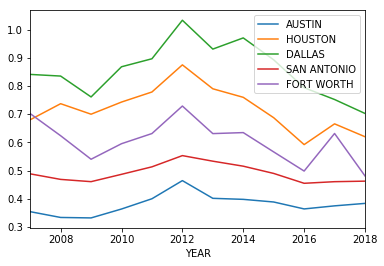

In [15]:


ax=time_series_austin.plot.line(x="YEAR", y="OPPORTUNITY_RATIO")
time_series_houston.plot(ax=ax, x="YEAR", y="OPPORTUNITY_RATIO")
time_series_dallas.plot(ax=ax, x="YEAR", y="OPPORTUNITY_RATIO")
time_series_san_ant.plot(ax=ax, x="YEAR", y="OPPORTUNITY_RATIO")
time_series_fw.plot(ax=ax, x="YEAR", y="OPPORTUNITY_RATIO")

ax.legend(["AUSTIN", "HOUSTON", "DALLAS", "SAN ANTONIO", "FORT WORTH"])



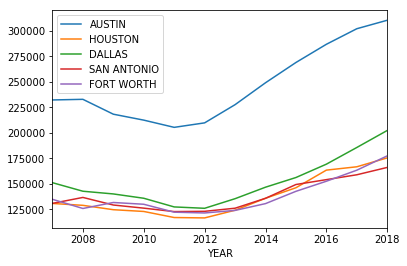

In [16]:
#Line plot showing property value over time in sample cities
ax=time_series_austin.plot.line(x="YEAR", y="AVG_PROP")
time_series_houston.plot(ax=ax, x="YEAR", y="AVG_PROP")
time_series_dallas.plot(ax=ax, x="YEAR", y="AVG_PROP")
time_series_san_ant.plot(ax=ax, x="YEAR", y="AVG_PROP")
time_series_fw.plot(ax=ax, x="YEAR", y="AVG_PROP")

ax.legend(["AUSTIN", "HOUSTON", "DALLAS", "SAN ANTONIO", "FORT WORTH"])

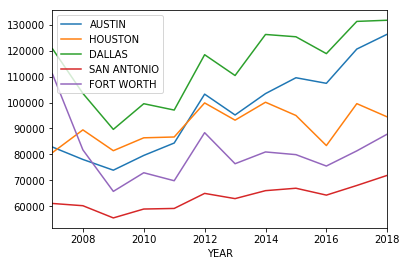

In [17]:
#Line plot showing income over time in sample cities
ax=time_series_austin.plot.line(x="YEAR", y="AVG_INCOME")
time_series_houston.plot(ax=ax, x="YEAR", y="AVG_INCOME")
time_series_dallas.plot(ax=ax, x="YEAR", y="AVG_INCOME")
time_series_san_ant.plot(ax=ax, x="YEAR", y="AVG_INCOME")
time_series_fw.plot(ax=ax, x="YEAR", y="AVG_INCOME")

ax.legend(["AUSTIN", "HOUSTON", "DALLAS", "SAN ANTONIO", "FORT WORTH"])